## Questions to Answer


is the price for vehicle x trending upwards or downwards
price prediction going forward

Whats the mean sale price of all sale records
Whats the mean sale price for each model year? (Avg sale price for all 2003 RS6? all 2021 RS6?

Is the avg sale price for all year models increasing or decreasing? - Moving Average
Is the avg sale price for each model year group increasing or decreasing - Moving average

What can we predict the price will be in the next x months?

In [16]:
import os
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
# scripts_dir = os.path.dirname(__file__)
# clean_output_file_SOLD_DATA_file_path= os.path.join(scripts_dir, '..','cleaned_data_SOLD_DATA.csv')
# clean_output_file =  open(clean_output_SOLD_DATA_file_path,"r",encoding="utf-8")
#read csv into pandas dataframe
#set col names


def process_cleaned_data():
    df = pd.read_csv('cleaned_data_SOLD_DATA.csv',header=None, names=['Year','Make','Model','Price','DateSold'])

    print(df)


        #drop first row of dataframe which is "'Year','Make','Model','Price','DateSold'" from CSV 
    df = df.drop(df.index[0])
    #replace any remaining na with 0
    # df = df.fillna(0)
    df = df.dropna()

    # df['Year'] = pd.to_datetime(df['Year'])

    #convert DateSold col from str to datetime object
    df['DateSold'] = pd.to_datetime(df['DateSold'])

    #convert price col to float
    df['Price'] = df['Price'].astype(float)
    df


    #sort by veh year ascending
    sorted_by_veh_year = df.sort_values(['Year'],ascending=True)
    sorted_by_veh_year

    # #get each unique veh year 
    # unique_veh_years = sorted_by_veh_year['Year'].unique()
    # #convert to numpy array
    # unique_veh_years = np.array(unique_veh_years)
    # #get the int values only, ignoring "dtype=object"
    # unique_veh_years = unique_veh_years.astype(int)

    # #make df, each row is unique year, col label = "Year"
    # stats_by_veh_year_df = pd.DataFrame({"Year":unique_veh_years})
    # stats_by_veh_year_df




    #this gets avg price for veh year
    #first group by year - this puts all rows with same year together
    #then calculate mean of price col for each year group
    #reset index of resulting df because - when you group the data the index might become hierarchical,
    #resetting makes the data frame have more straightforward index
    t = sorted_by_veh_year.groupby('Year').agg({'Price':'mean'}).reset_index()


    #rename price col to Avg Sale Price
    t.rename(columns={'Price': 'Avg Sale Price'}, inplace=True)
    t



    # get the max price for each year
    # first group all rows by year
    # then on each group, get the max, store as new df
    # in df, rename 'Price' to 'Max_sale_price_by_year'
    # merge new df into original df on year

    max_sale_price_by_year = sorted_by_veh_year.groupby('Year')['Price'].max().reset_index()

    max_sale_price_by_year.rename(columns={'Price':'max_sale_price_by_year'},inplace=True)
    t=t.merge(max_sale_price_by_year, on='Year',how='left')
    t

    return t

# ----------------------------------------------------------------


# ----------------------------------------------------------------
#Calulcating Basic Stats (avg price/year, most common year for sale etc)


In [8]:


# #sort by DateSold (earliest to latest)
# #set DateSold as index
# sorted_by_sale_date_ascending = df.sort_values(['DateSold'],ascending=True)
# sorted_by_sale_date_ascending.set_index('DateSold')




In [9]:
#plot prices and mean sale price of all records

# dfSold = sorted_by_sale_date_ascending
# dfSold["Mean Sale Price"] = dfSold["Price"].mean()
# dfSold
# dfSold[['DateSold','Price','Mean Sale Price']].plot(figsize=(11,4),x='DateSold',y=['Price','Mean Sale Price'])

In [10]:
# dfSold


# ----------------------------------------------------------------
# EMA CALC

In [11]:
# #EMA with window of n = 3 
# dfSold['EMA'] = dfSold['Price'].rolling(window=3).mean()
# dfSold[['DateSold','Price','EMA']].plot(figsize=(11,4),x='DateSold',y=['Price','EMA'])
# # dfSold[['DateSold','Price','Mean Sale Price']].plot()

Resource: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

Moving Averages in python (simple,cumulative,exponential)

Moving average commonly used with time series to smooth random short term variations and to highlight other components - like trend season or cycle

moving average also known as rolling mean and is calculated by averaging data of the time series within k periods of time

commonly used in finance to determine trends in the market

Most common type of moving averages
    simple moving average
    cumulative moving average
    exponentatial moving average
    
When theres lots of fluctations and noise in the visualized data, we can use moving averages to smooth the time series
  


Simple moving average:
unweighted mean of the previous M data points
Selection of M(sliding window_ depends on amount of smoothing you want
increasing the value of M improves smoothing at expense of accuracy

Easiest way to calc SMA is usingn pandas.Series.rolling method 

Provides rolling windows over the data
on resulting windows, we can perform calculation using a stat function (mean)

size of window is the number of periods, we specify this in the argument 'window'

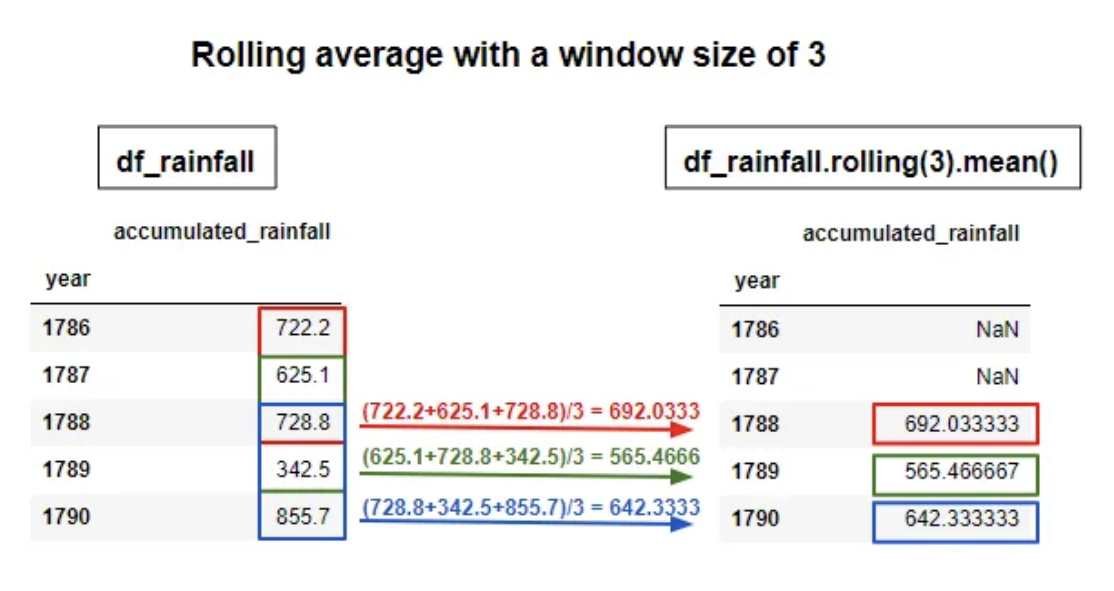

The first rows return series of null values because we need a min of n values before each data point - at val 1, theres isnt n vals before it, at val 2, there isnt n vals before it..



In [12]:
# #want to calc avg price for each year

# #groupby model Year
# grouped_by_vehyear = sorted_by_sale_date.groupby('Year')
# grouped_by_vehyear.describe()


# #get mean price for each year group
# mean_price_each_year = grouped_by_vehyear.mean()
# print(mean_price_each_year)




In [13]:
# #calc standard deviation
# print(sorted_by_sale_date['Price'])

# #do this overall for all sales records
# print(f"std dev for all records:  {sorted_by_sale_date['Price'].std()}")

# #do this for sales records by model year
# print(f"std dev by model year group:{grouped_by_vehyear['Price'].std()}")

In [14]:
# #Plot mean of each model year
# mean_price_each_year = grouped_by_vehyear.mean()
# print(mean_price_each_year)
# mean_price_each_year.plot()

# ----------------------------------------------------

Setting up target 
https://www.dataquest.io/blog/portfolio-project-predicting-stock-prices-using-pandas-and-scikit-learn/
